In [28]:
import torch
from transformers import (
    BertForSequenceClassification,
    BertTokenizer,
    DistilBertForSequenceClassification,
    DistilBertTokenizer,
)


# BERT

In [29]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [30]:
text = "Fuck you"

In [31]:
# Токенизация текста и создание тензора входных данных
inputs = tokenizer(
    text, padding=True, return_tensors="pt", truncation=True, max_length=512
)
inputs

{'input_ids': tensor([[ 101, 6616, 2017,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1]])}

In [32]:
with torch.no_grad():
    outputs = model(**inputs)

In [33]:
logits = outputs.logits
print(f"logits: {logits}")

logits: tensor([[ 0.9030, -0.2692]])


In [34]:
# Определяем метку класса
predicted_class = torch.argmax(logits, dim=1).item()
print("Predicted class:", predicted_class)

Predicted class: 0


# DistillBERT

In [35]:
# Загрузка токенизатора и модели DistilBERT для бинарной классификации
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", num_labels=2
)

# Пример текста для классификации
text = "DistilBERT is a faster and lighter version of BERT."

# Токенизация текста
inputs = tokenizer(
    text, return_tensors="pt", padding=True, truncation=True, max_length=512
)

# Прогон через модель
with torch.no_grad():
    outputs = model(**inputs)

# Получаем логиты (сырые предсказания)
logits = outputs.logits
print("Logits:", logits)

# Определяем класс на основе логитов
predicted_class = torch.argmax(logits, dim=1).item()
print("Predicted class:", predicted_class)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Logits: tensor([[0.1060, 0.1038]])
Predicted class: 0


In [4]:
import torch
from sklearn.metrics.pairwise import cosine_similarity
from transformers import BertModel, BertTokenizer

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")


def get_embedding(text):
    # Tokenize input text
    inputs = tokenizer(
        text, return_tensors="pt", padding=True, truncation=True, max_length=512
    )

    # Get hidden states from BERT
    with torch.no_grad():
        outputs = model(**inputs)

    # Get the embeddings of the [CLS] token (first token)
    cls_embedding = outputs.last_hidden_state[:, 0, :]

    return cls_embedding


def calculate_similarity(resume_text, vacancy_text):
    # Get embeddings for both texts
    resume_embedding = get_embedding(resume_text)
    vacancy_embedding = get_embedding(vacancy_text)

    # Calculate cosine similarity
    similarity = cosine_similarity(resume_embedding.numpy(), vacancy_embedding.numpy())

    return similarity[0][0]


# Example texts
resume = "Experienced software engineer with expertise in Python and machine learning."
vacancy = "London is a capital of Grait  Britain."


# Calculate and print similarity
similarity_score = calculate_similarity(resume, vacancy)
print(f"Similarity Score: {similarity_score:.4f}")


c:\VSCode_projects\pytorch_templates\.venv\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Similarity Score: 0.6536


Epoch [100/1000], Loss: 107.0737
Epoch [200/1000], Loss: 45.9915
Epoch [300/1000], Loss: 13.9989
Epoch [400/1000], Loss: 5.5799
Epoch [500/1000], Loss: 2.7211
Epoch [600/1000], Loss: 1.5201
Epoch [700/1000], Loss: 0.9274
Epoch [800/1000], Loss: 0.6038
Epoch [900/1000], Loss: 0.4153
Epoch [1000/1000], Loss: 0.2982


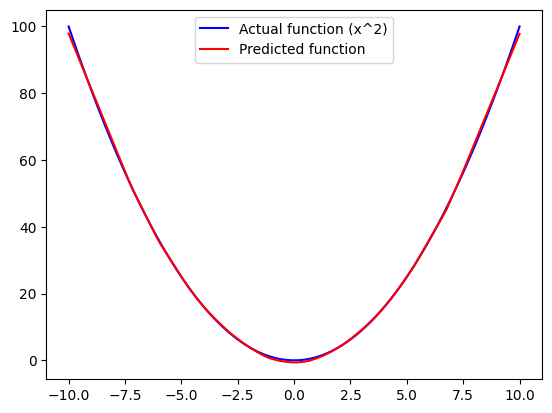

In [6]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

# Генерация данных
x_train = torch.linspace(-10, 10, 100).view(-1, 1)
y_train = x_train**2


# Определение двухслойной нейронной сети
class TwoLayerNet(nn.Module):
    def __init__(self):
        super(TwoLayerNet, self).__init__()
        self.fc1 = nn.Linear(1, 100)  # Первый слой: 1 входное значение -> 10 нейронов
        self.fc2 = nn.Linear(100, 1)  # Второй слой: 10 нейронов -> 1 выходное значение

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Применение ReLU к первому слою
        x = self.fc2(x)  # Применение второго слоя
        return x


# Создание модели
model = TwoLayerNet()

# Функция потерь и оптимизатор
criterion = nn.MSELoss()  # Среднеквадратичная ошибка
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Тренировка модели
epochs = 1000
for epoch in range(epochs):
    model.train()

    # Прямой проход
    outputs = model(x_train)
    loss = criterion(outputs, y_train)

    # Обратный проход и оптимизация
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# Тестирование модели
model.eval()
with torch.no_grad():
    predicted = model(x_train)

# Визуализация
plt.plot(x_train.numpy(), y_train.numpy(), label="Actual function (x^2)", color="blue")
plt.plot(x_train.numpy(), predicted.numpy(), label="Predicted function", color="red")
plt.legend()
plt.show()


In [8]:
model(10)

TypeError: linear(): argument 'input' (position 1) must be Tensor, not int